In [36]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../../../')

from main import load_and_prepare_sessions
from processing.session_sampling import MiceAnalysis
import matplotlib.pyplot as plt
from analysis.timepoint_analysis import sample_signals_and_metrics
from plotting.main_plotting import plot_signals
import numpy as np
import itertools
from analysis.timepoint_analysis import sample_low_and_high_signals
import numpy as np
from scipy.stats import ttest_ind
from itertools import chain
from utils import mouse_br_events_count
from config import attr_interval_dict, all_brain_regions, all_metrics, all_event_types, response_metric_idxs
all_event_types = all_event_types[:-1]


sessions = load_and_prepare_sessions("../../../../Baseline", load_from_pickle=True, remove_bad_signal_sessions=True)
mouse_analyser = MiceAnalysis(sessions)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
brain_reg_to_color = {'VS': 'purple',
                      'DMS': 'forestgreen',
                      'DLS': 'C0'}

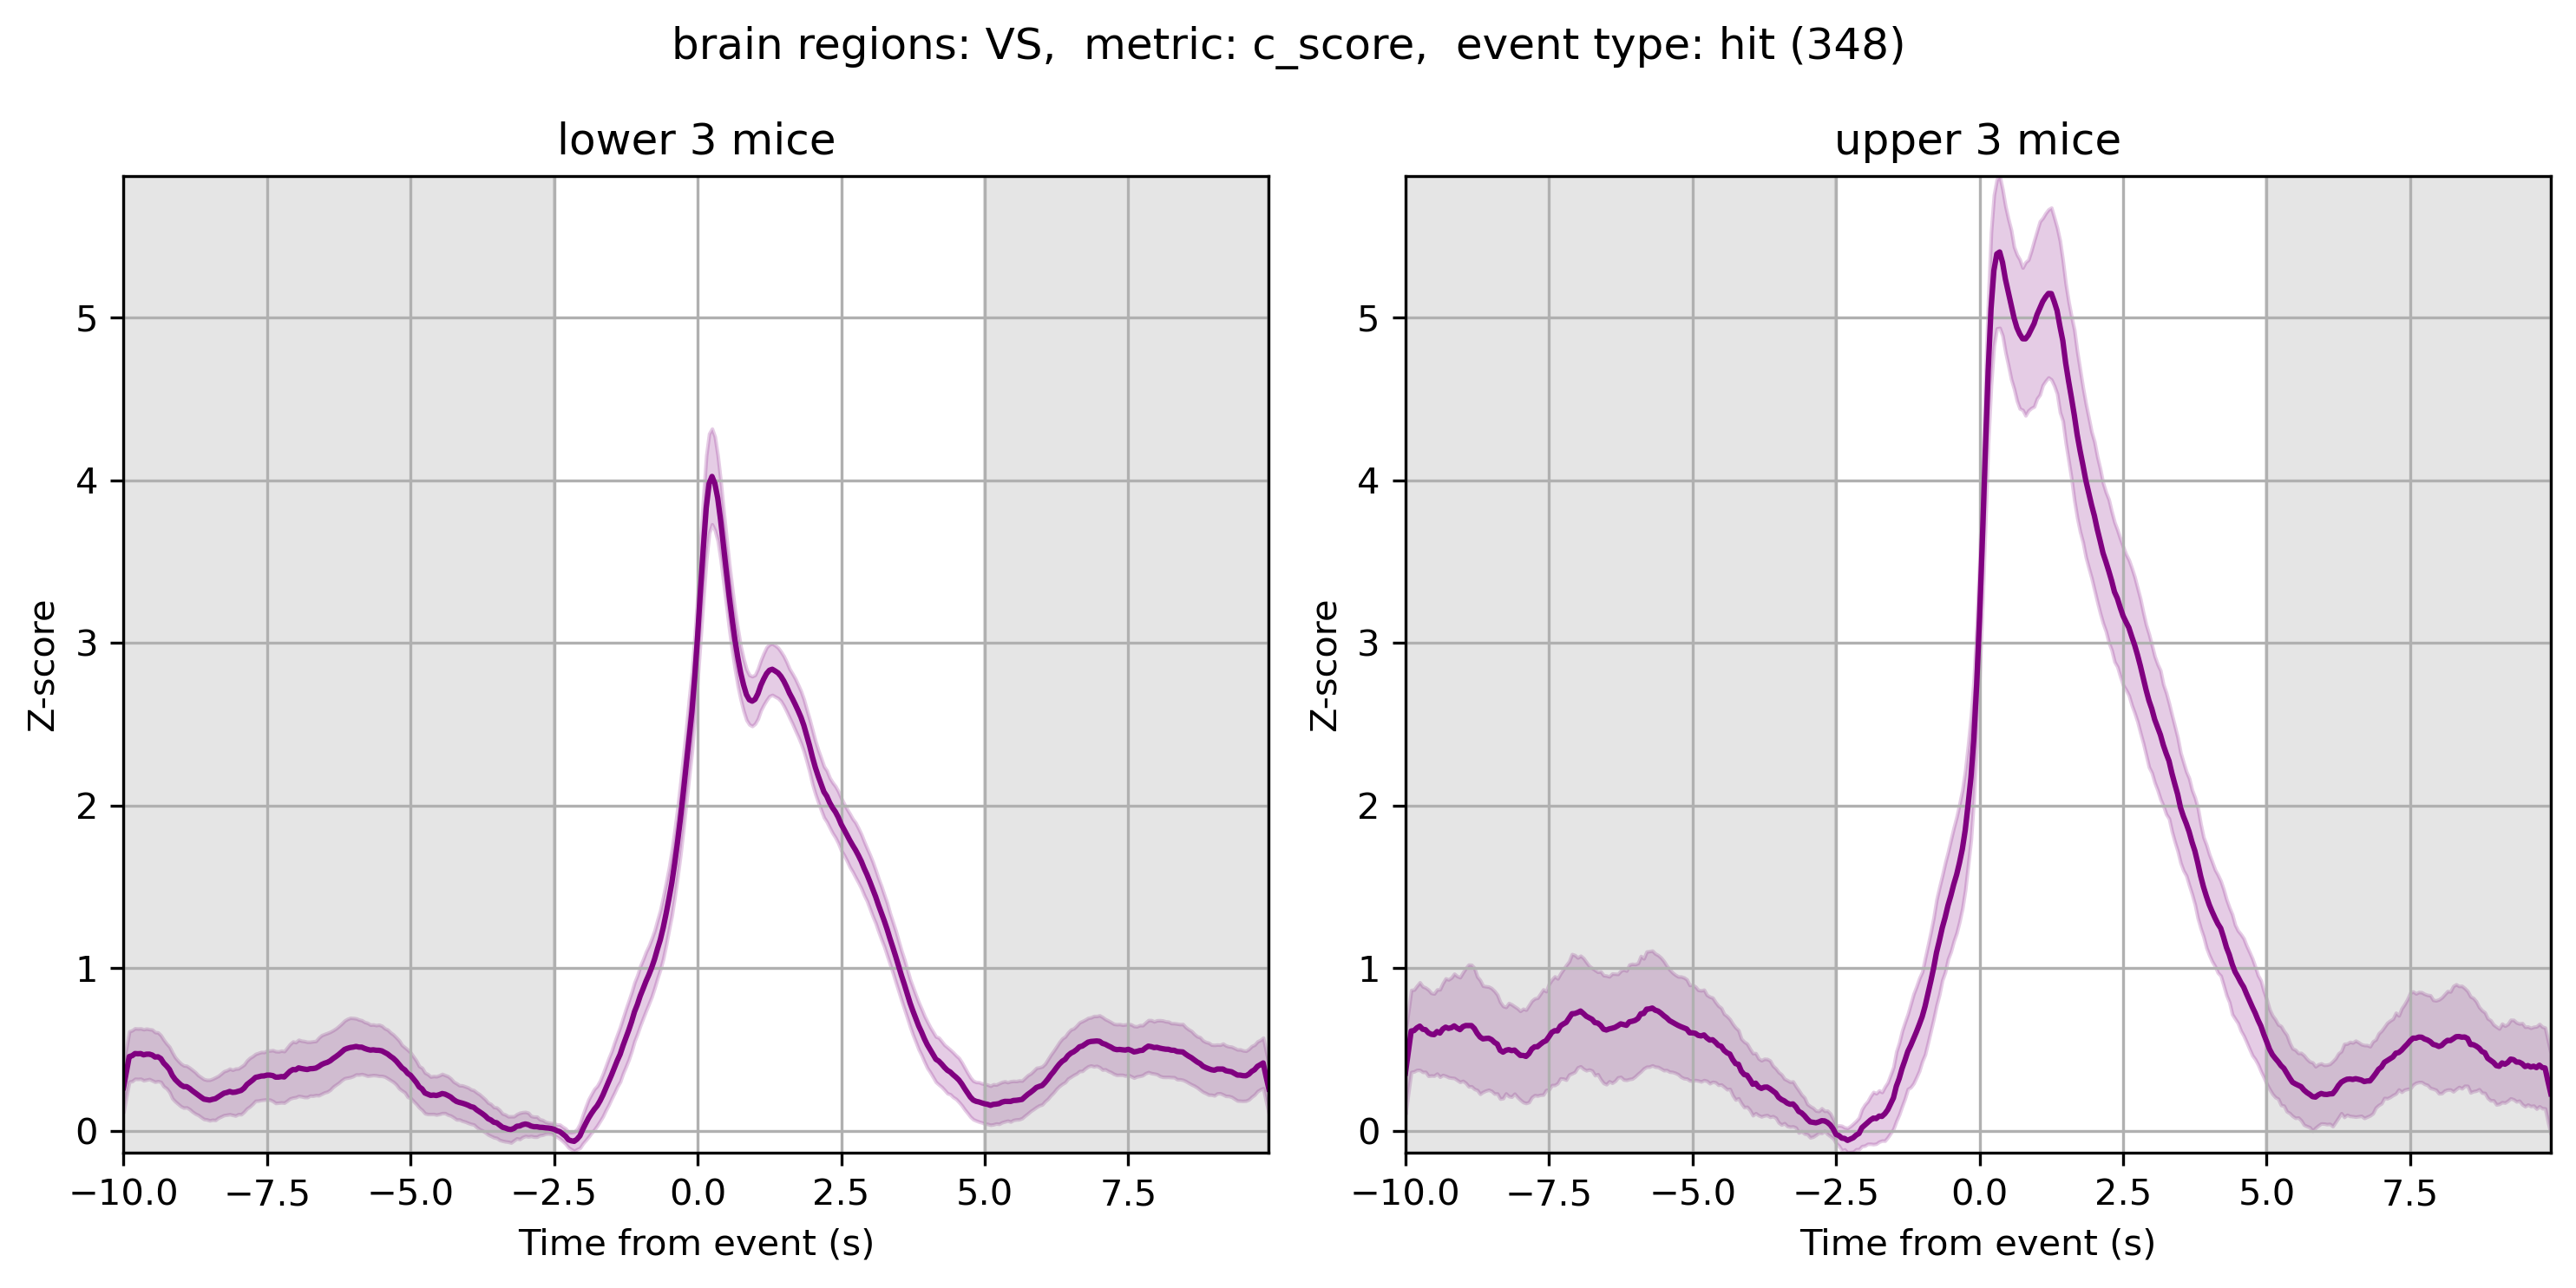

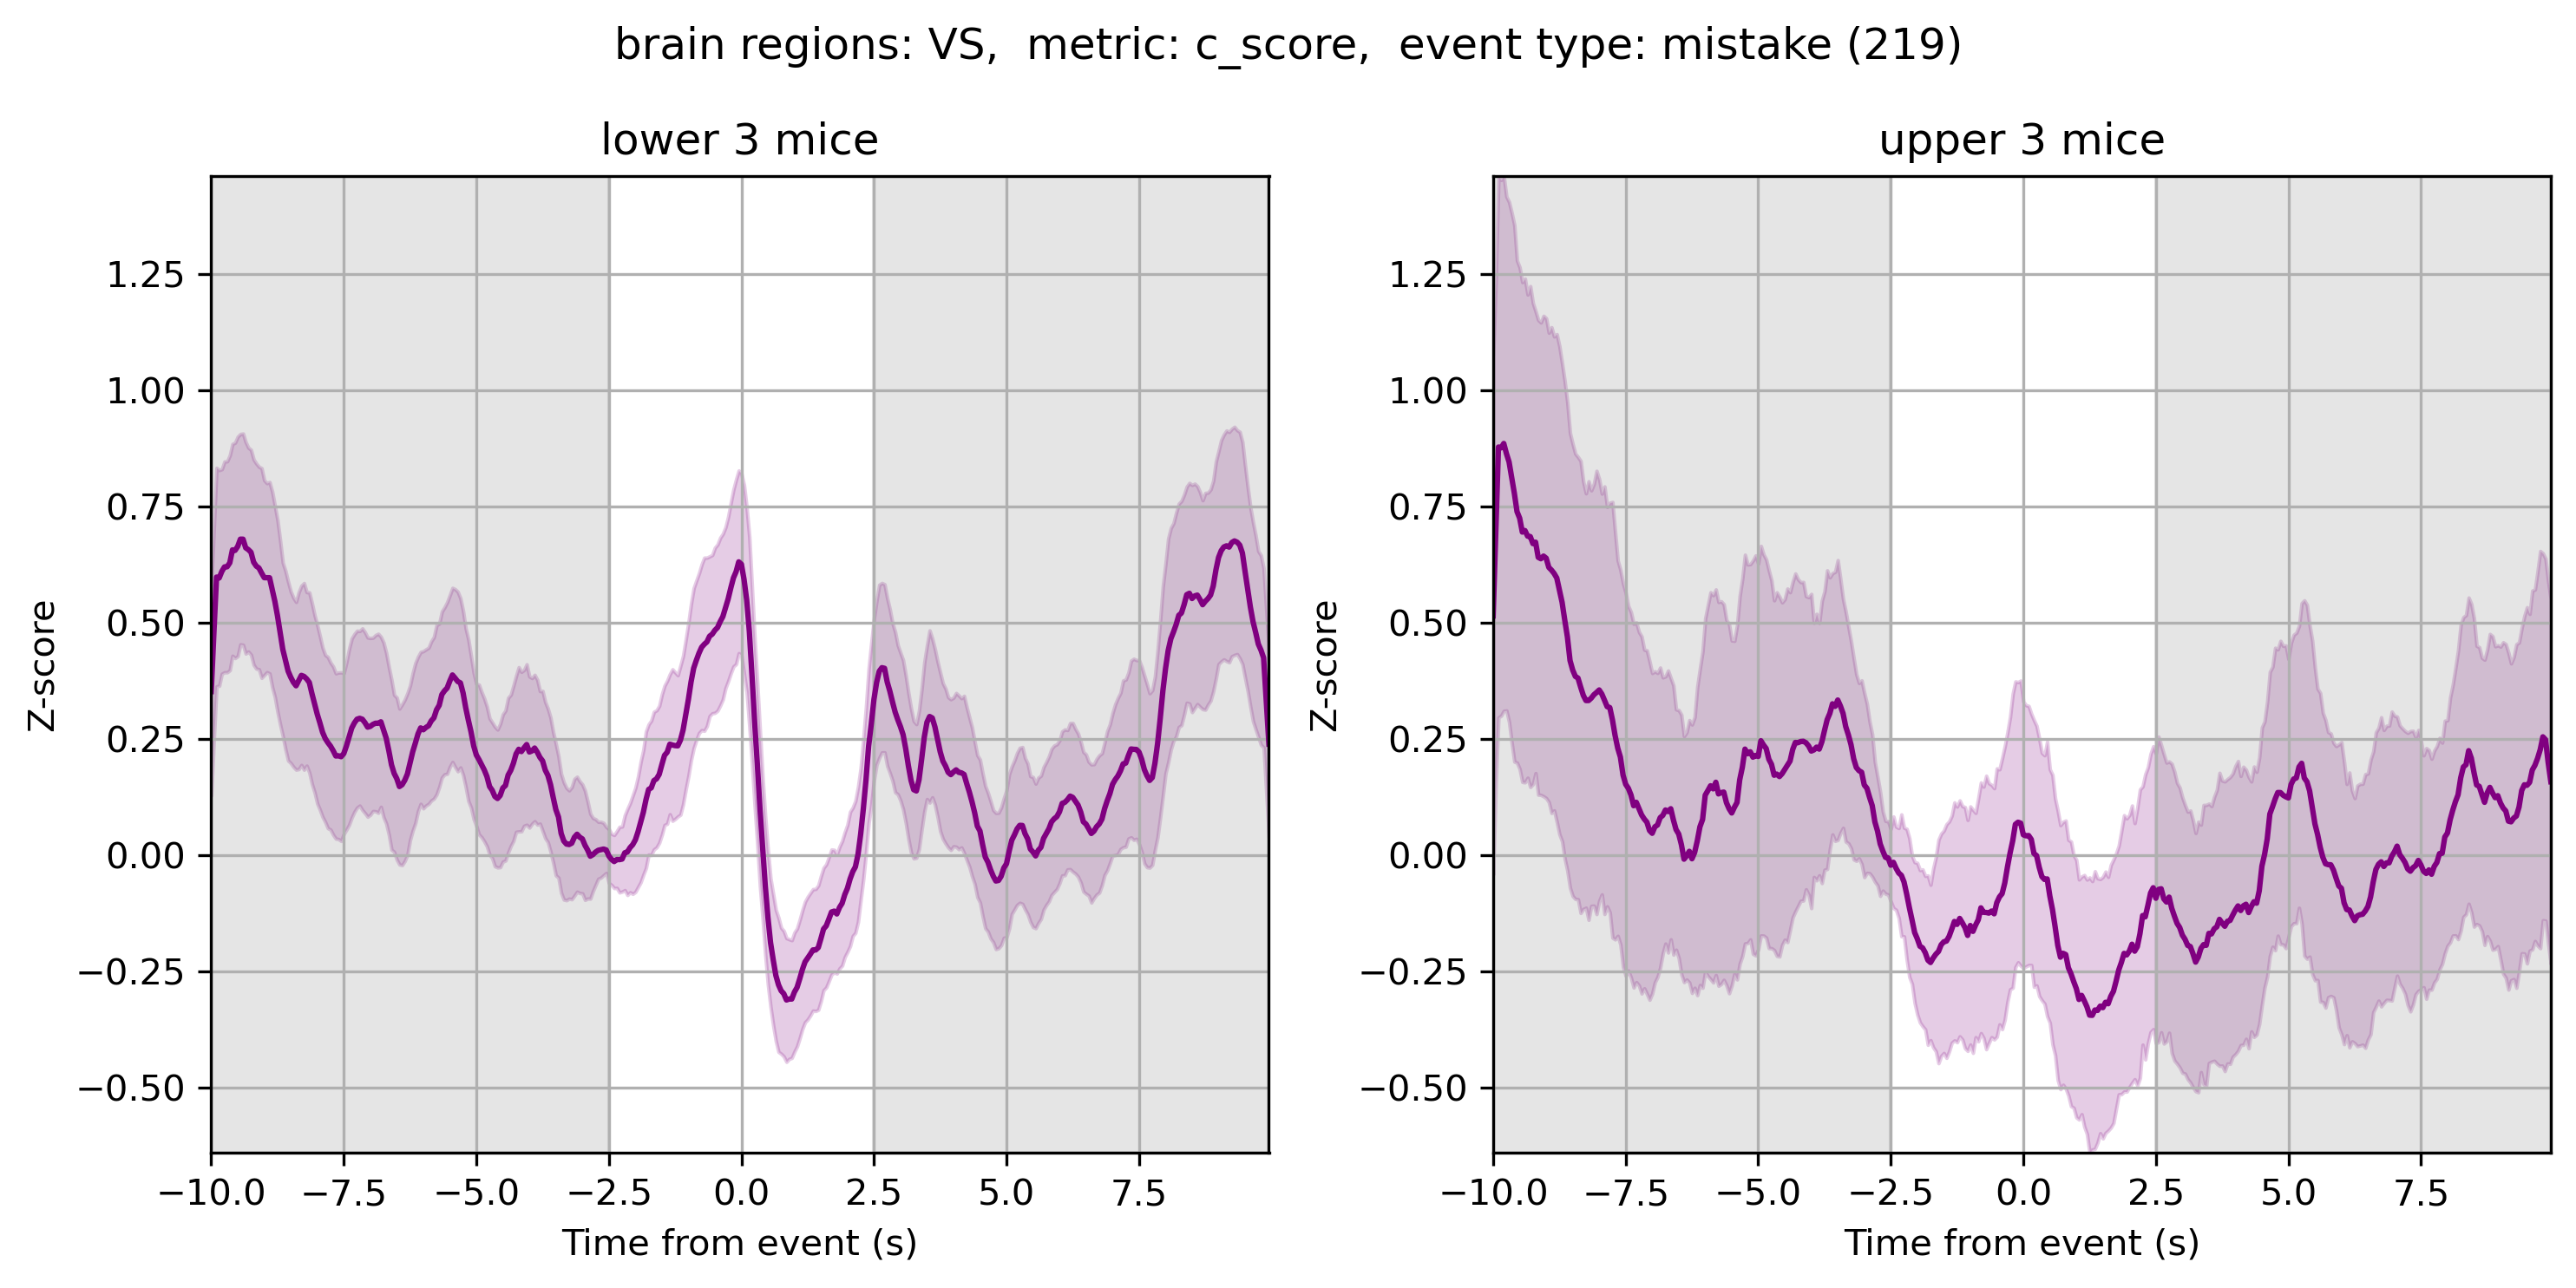

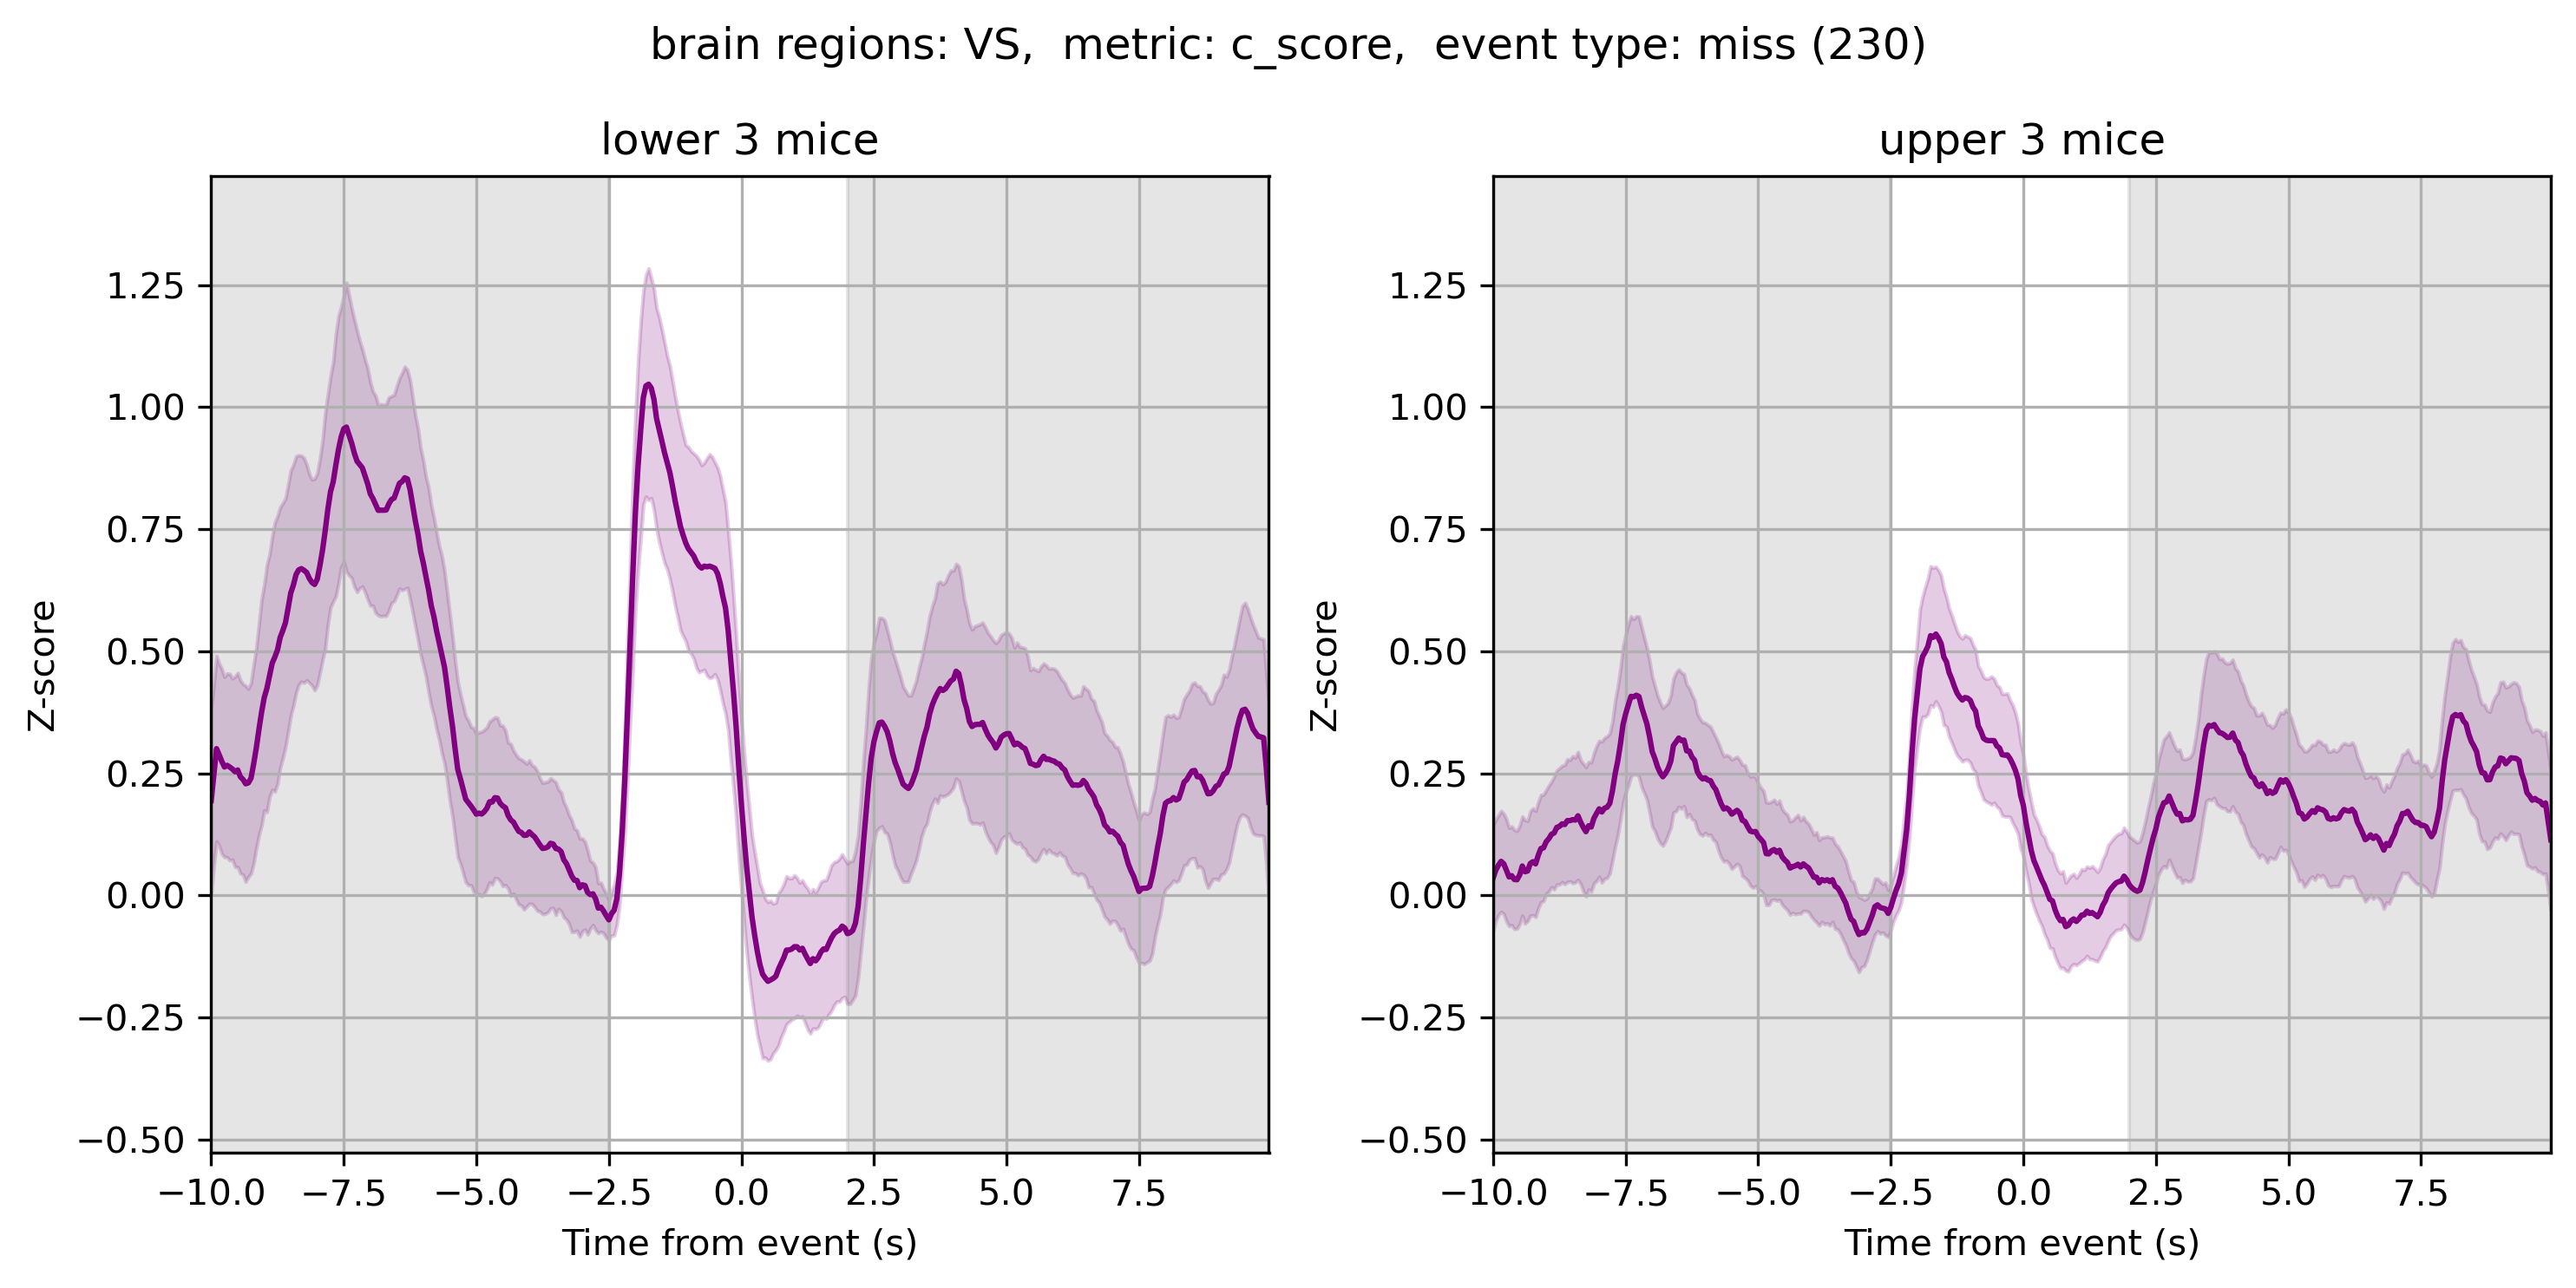

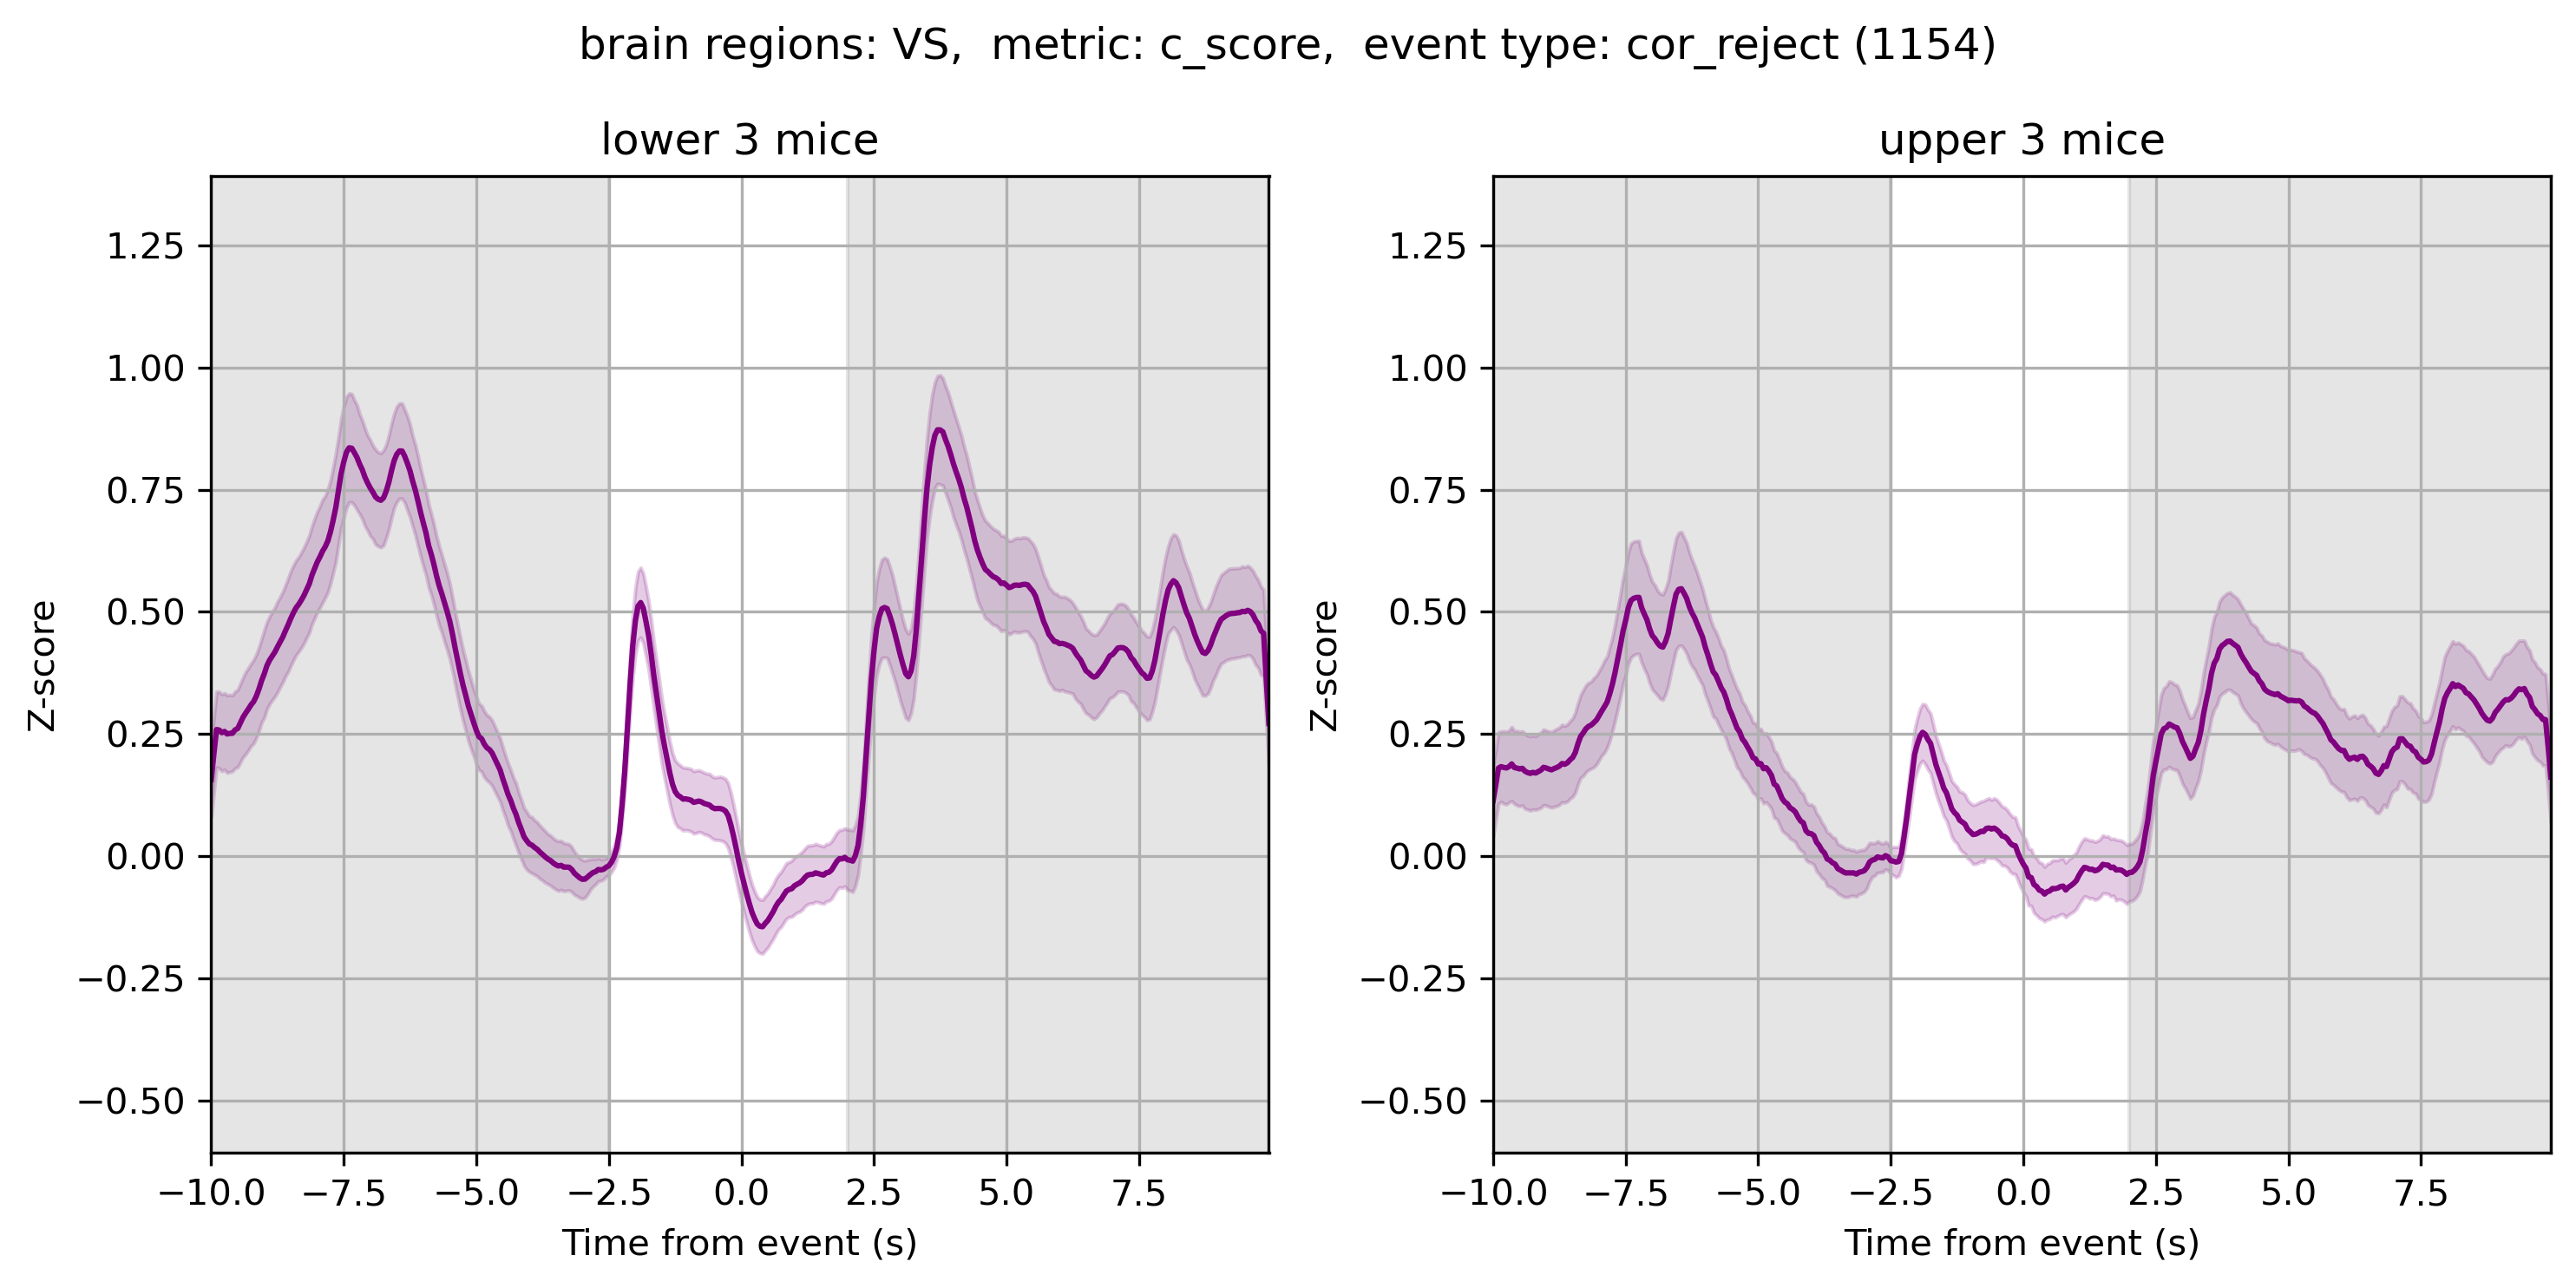

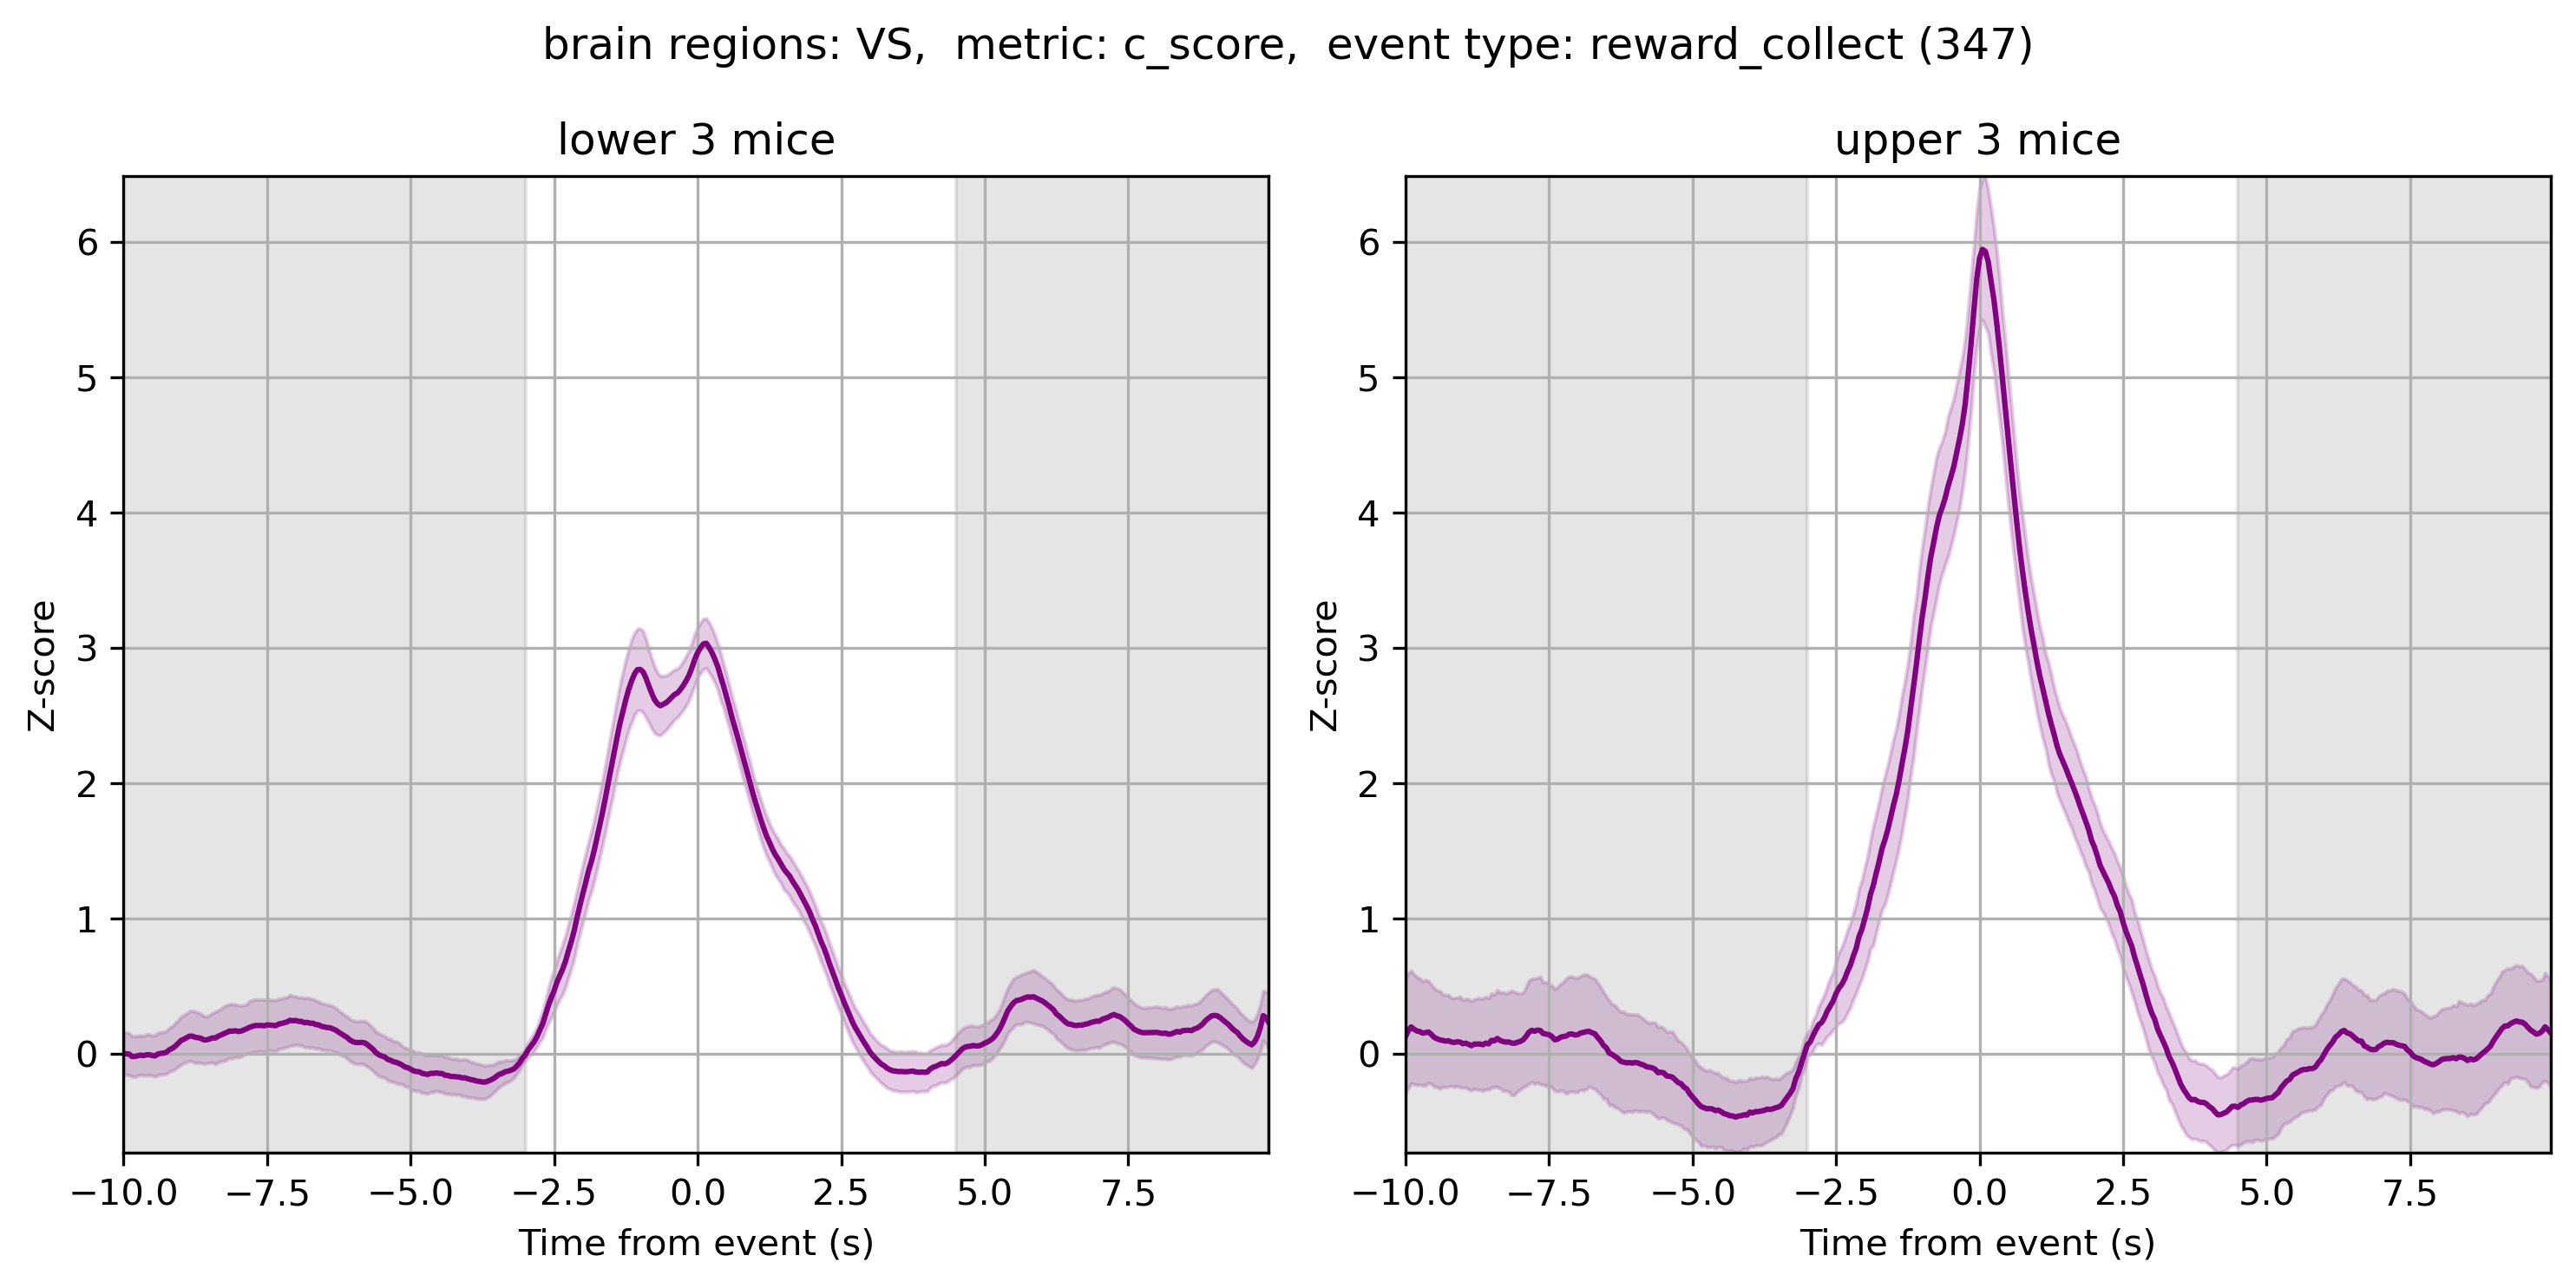

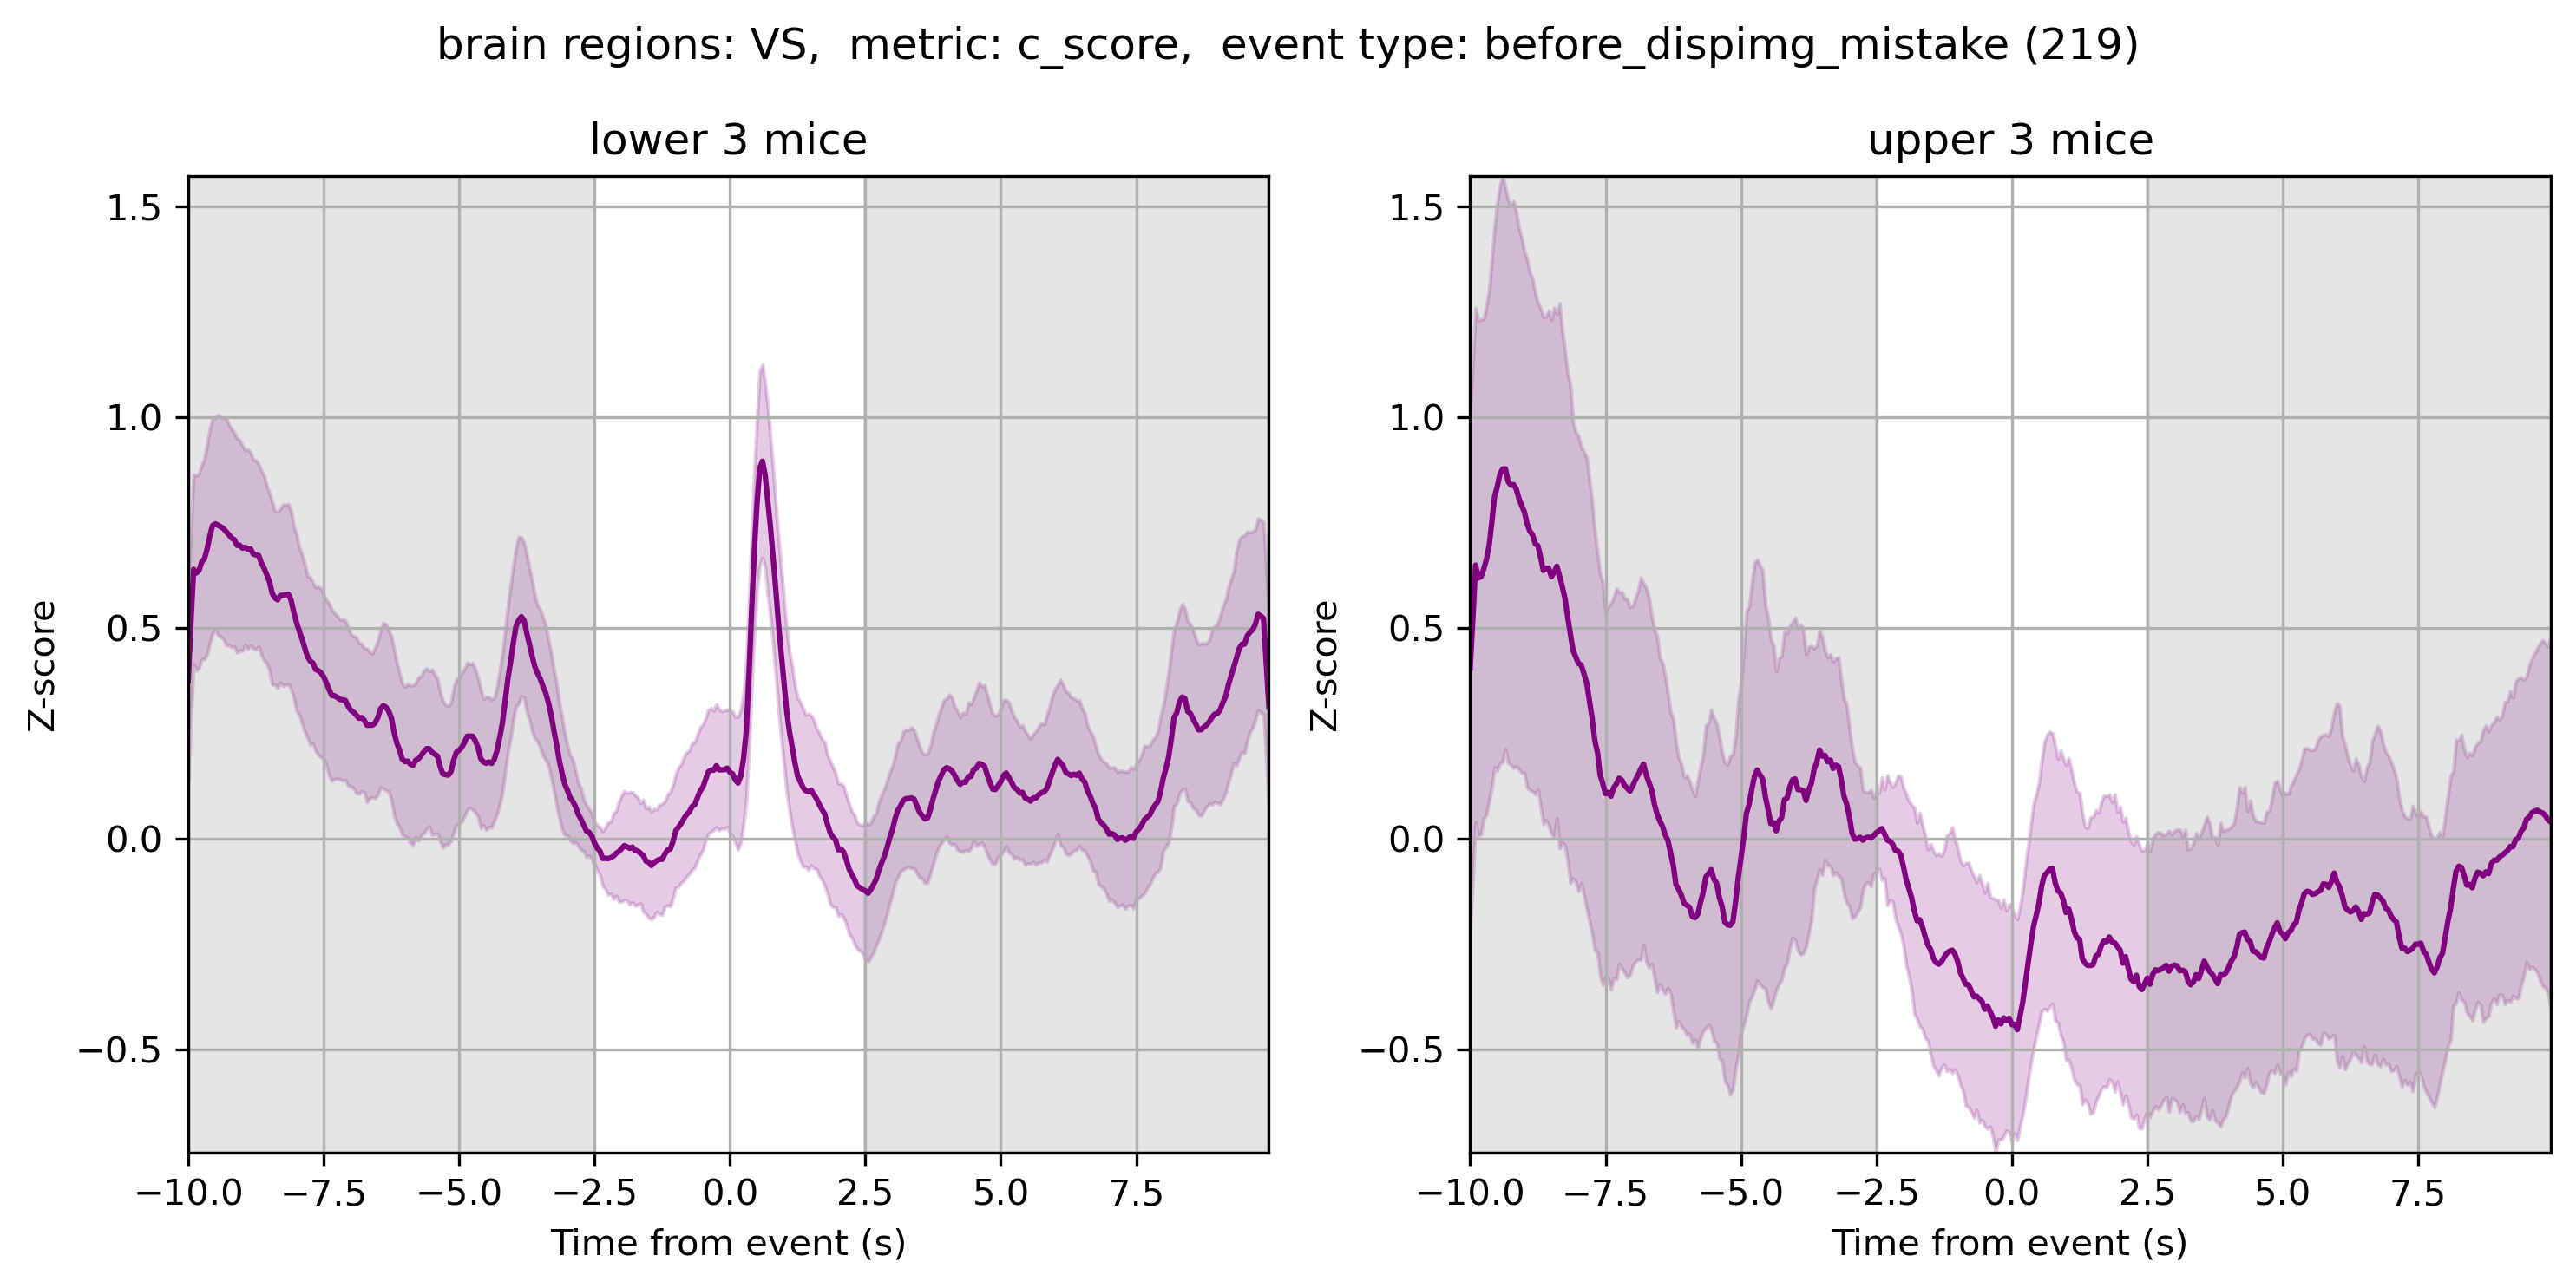

KeyboardInterrupt: 

In [57]:
for performance_metric, brain_region, event in itertools.product(all_metrics, all_brain_regions, all_event_types):
    low_signals, high_signals, low_resp_metrics, high_resp_metrics = \
        sample_low_and_high_signals('events', performance_metric, brain_region, event, mouse_analyser)
    
    sb = attr_interval_dict[event]
    suptitle = f"brain regions: {brain_region},  metric: {performance_metric},  event type: {event} ({low_signals.shape[0]})"

    low_subtitle = f"lower 3 mice"
    high_subtitle = f"upper 3 mice"

    color = brain_reg_to_color[brain_region]
    plot_signals([low_signals, high_signals], [low_subtitle, high_subtitle], suptitle, color, 
                    5, sb)#, fname=f'{performance_metric}_{brain_region}_{event}.png')

In [61]:
for performance_metric, brain_region, event in itertools.product(all_metrics, all_brain_regions, all_event_types):
    low_signals, high_signals, low_resp_metrics, high_resp_metrics = \
        sample_low_and_high_signals('events', performance_metric, brain_region, event, mouse_analyser)
    print(performance_metric, brain_region, event)

c_score VS hit
c_score VS mistake
c_score VS miss
c_score VS cor_reject
c_score VS reward_collect
c_score VS before_dispimg_mistake
c_score VS before_dispimg_hit
c_score DMS hit
c_score DMS mistake
c_score DMS miss
c_score DMS cor_reject
c_score DMS reward_collect
c_score DMS before_dispimg_mistake
c_score DMS before_dispimg_hit
c_score DLS hit
c_score DLS mistake
c_score DLS miss
c_score DLS cor_reject
c_score DLS reward_collect
c_score DLS before_dispimg_mistake
c_score DLS before_dispimg_hit
d_prime VS hit
d_prime VS mistake
d_prime VS miss
d_prime VS cor_reject
d_prime VS reward_collect
d_prime VS before_dispimg_mistake
d_prime VS before_dispimg_hit
d_prime DMS hit
d_prime DMS mistake
d_prime DMS miss
d_prime DMS cor_reject
d_prime DMS reward_collect
d_prime DMS before_dispimg_mistake
d_prime DMS before_dispimg_hit
d_prime DLS hit
d_prime DLS mistake
d_prime DLS miss
d_prime DLS cor_reject
d_prime DLS reward_collect
d_prime DLS before_dispimg_mistake
d_prime DLS before_dispimg_hit


In [62]:
def plot_mouse_comparison(brain_region, performance_metric, event):
    low_signals, high_signals, _, _ = \
    sample_low_and_high_signals('events', performance_metric, brain_region, event, mouse_analyser)

    sb = attr_interval_dict[event]
    suptitle = f"brain regions: {brain_region},  metric: {performance_metric},  event type: {event} ({low_signals.shape[0]})"

    low_subtitle = f"lower 3 mice"
    high_subtitle = f"upper 3 mice"

    color = brain_reg_to_color[brain_region]
    plot_signals([low_signals, high_signals], [low_subtitle, high_subtitle], suptitle, color, 
                    5, sb)#, fname=f'{performance_metric}_{brain_region}_{event}.png')

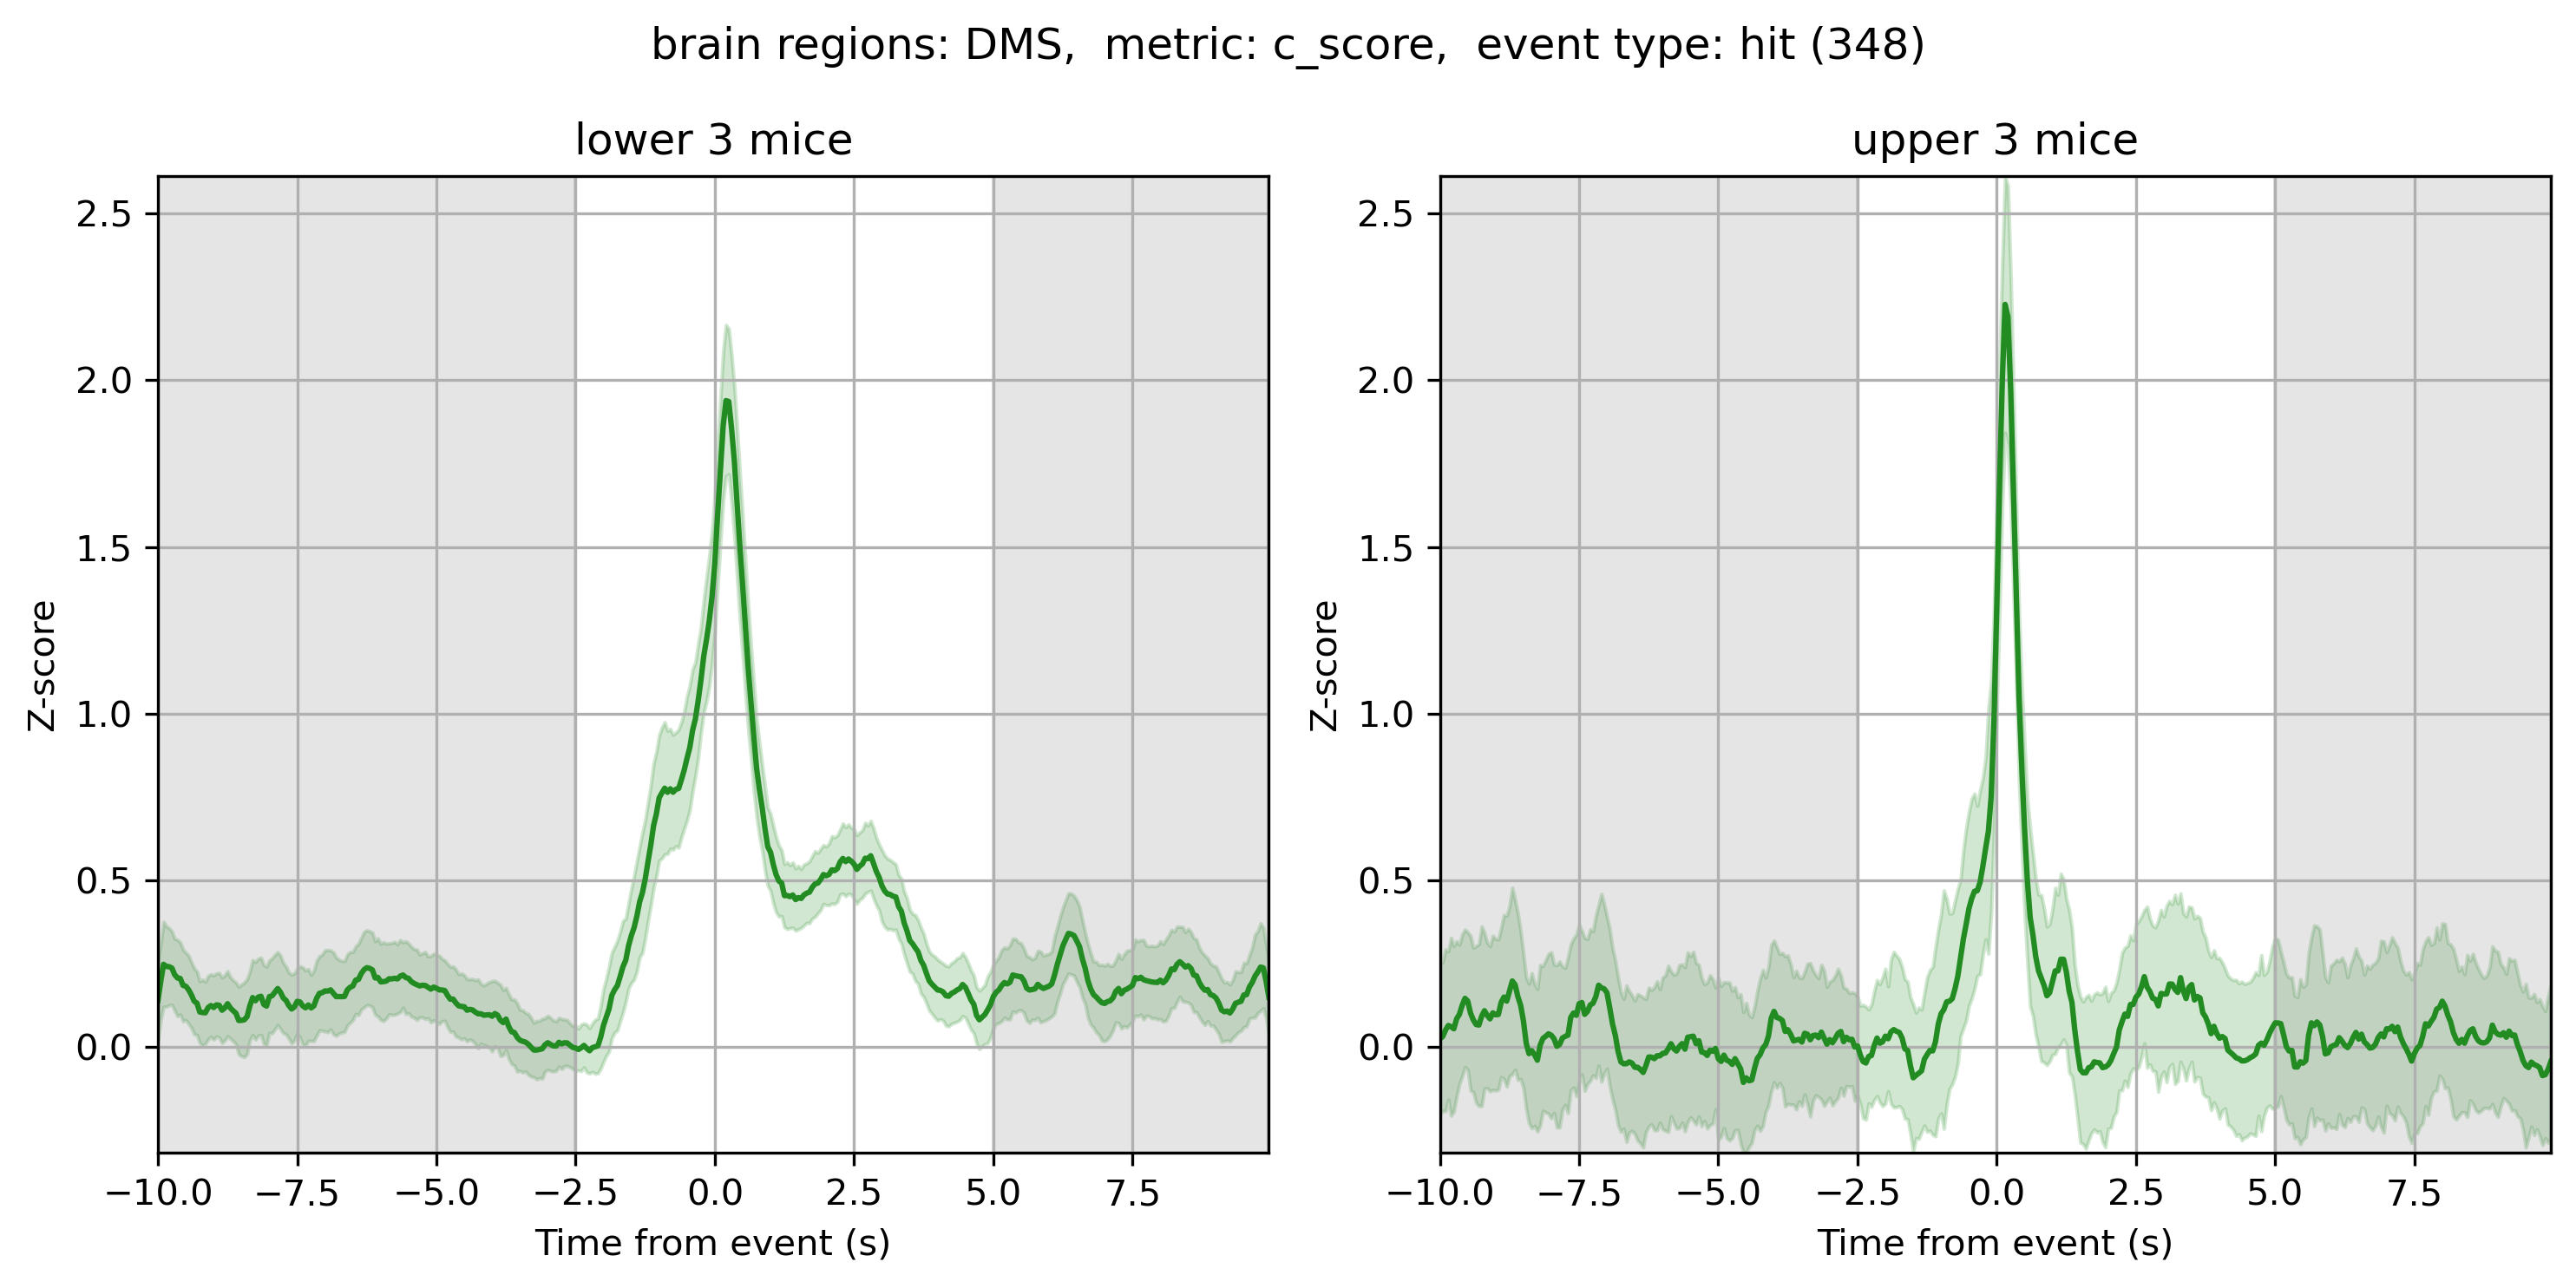

In [63]:
plot_mouse_comparison('DMS', 'c_score', 'hit')